### Following is the source code for preprocessing the data:

### Steps to follow:

### 1. Importing the Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 5.0)

### 2. Load the training and test datasets 

In [11]:
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

xTrain, yTrain = load_data('Downloads/train_32x32.mat')
xTest, yTest = load_data('Downloads/test_32x32.mat')

print("Training Set: ", xTrain.shape, yTrain.shape)
print("Test Set: ", xTest.shape, yTest.shape)

Training Set:  (32, 32, 3, 73257) (73257, 1)
Test Set:  (32, 32, 3, 26032) (26032, 1)


### 3. Converting (width, height, channels, size) to (size, width, height, channels) by taking the transpose

In [12]:

xTrain, yTrain = xTrain.transpose((3,0,1,2)), yTrain[:,0]
xTest, yTest = xTest.transpose((3,0,1,2)), yTest[:,0]

print("Training Set: ", xTrain.shape)
print("Test Set: ", xTest.shape)

total_image = xTrain.shape[0] + xTest.shape[0]

print("Total Images: ", total_image)

Training Set:  (73257, 32, 32, 3)
Test Set:  (26032, 32, 32, 3)
Total Images:  99289


### 4. Defining function for ploting the images in m rows and n columns

In [13]:
def plotImages(image, label, rows, cols):
  
    figure, axis = plt.subplots(rows, cols)
    for i, j in enumerate(axis.flat): 
        if image[i].shape == (32, 32, 3):
            j.imshow(image[i])
        else:
            j.imshow(image[i,:,:,0])
        j.set_xticks([]); j.set_yticks([])
        j.set_title(label[i])

### 5. Plotting few images of training set

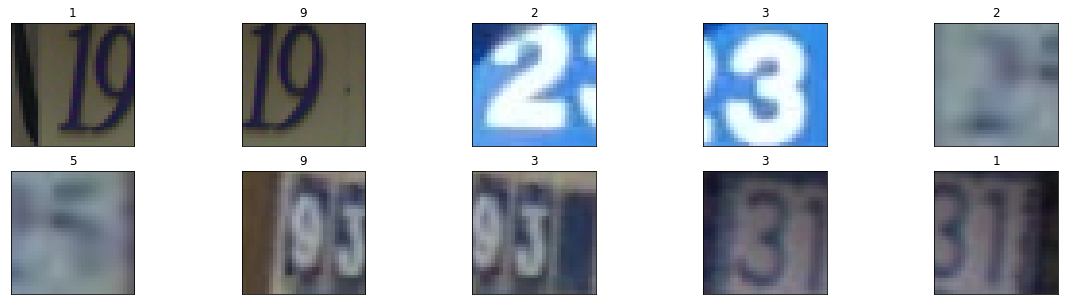

In [14]:
plotImages(xTrain, yTrain, 2,5)

### 6. Plotting few images of test data set

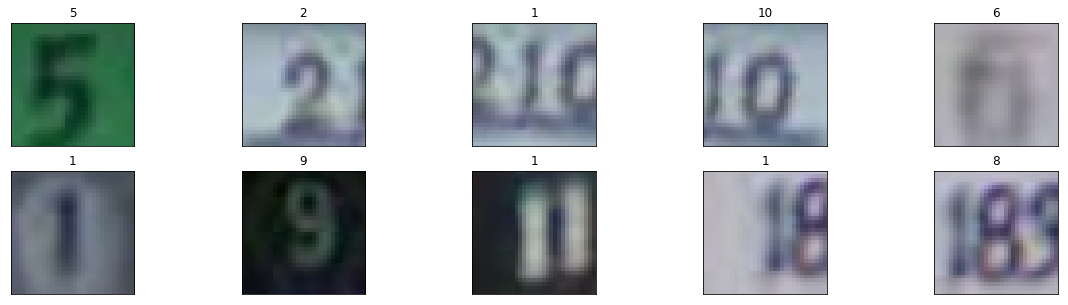

In [15]:
plotImages(xTest, yTest, 2,5)

### 7. Checking unique labels in the training set

In [16]:
print(np.unique(yTrain))

[ 1  2  3  4  5  6  7  8  9 10]


### 8. Splitting the training set into Training+Validation set

In [17]:
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.15, random_state=9)

### 9. Converting rgb into grayscale reduces the amount of data to process.
###          Gray = 0.2990R + 0.5870G + 0.1140B
###          Defining a function for conversion

In [18]:
def rgb2grayscale(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

trainGrayscale = rgb2grayscale(xTrain).astype(np.float32)
testGrayscale = rgb2grayscale(xTest).astype(np.float32)
valGrayscale = rgb2grayscale(xVal).astype(np.float32)

print("Training Set: ", trainGrayscale.shape)
print("Validation Set: ", valGrayscale.shape)
print("Test Set: ", testGrayscale.shape)

Training Set:  (62268, 32, 32, 1)
Validation Set:  (10989, 32, 32, 1)
Test Set:  (26032, 32, 32, 1)


### 10. Deleting the datasets to free up space

In [19]:
del xTrain, xTest, xVal

### 11. Plotting the grayscale images

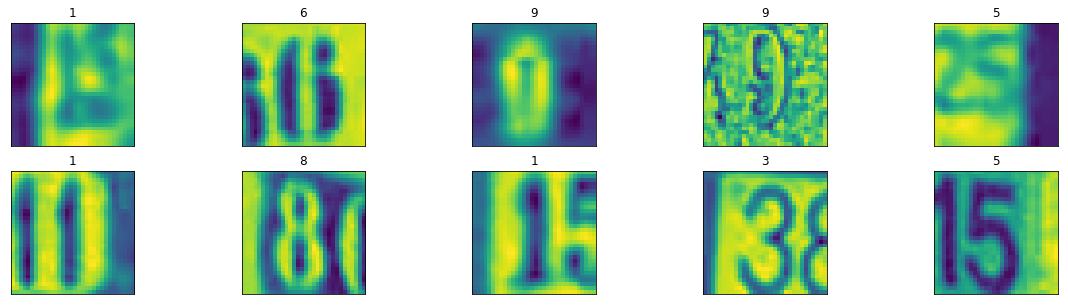

In [20]:
plotImages(trainGrayscale, yTrain, 2,5)

### 12. Normalizing the data by finding mean and standard deviation of the training set and subtracting it equally from all splits

In [21]:
trainMean = np.mean(trainGrayscale, axis=0)

trainSD = np.std(trainGrayscale, axis=0)

trainGrayscale_norm = (trainGrayscale - trainMean) / trainSD
testGrayscale_norm = (testGrayscale - trainMean)  / trainSD
valGrayscale_norm = (valGrayscale - trainMean) / trainSD

### 13. Plotting the normalized images

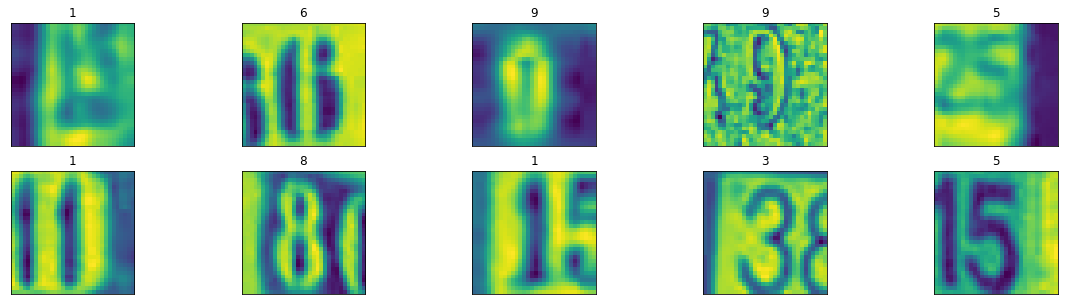

In [22]:
plotImages(trainGrayscale_norm, yTrain, 2,5)

### 14. Apply One Hot Encoding to make label suitable for CNN Classification

In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(yTrain.reshape(-1, 1))

yTrain = enc.transform(yTrain.reshape(-1, 1)).toarray()
yTest = enc.transform(yTest.reshape(-1, 1)).toarray()
yVal = enc.transform(yVal.reshape(-1, 1)).toarray()

print("Training set: ", yTrain.shape)
print("Validation set: ", yVal.shape)
print("Test set: ", yTest.shape)

Training set:  (62268, 10)
Validation set:  (10989, 10)
Test set:  (26032, 10)


C:\Users\Mitwa Palkhiwala\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### 15. Storing data to disk

In [24]:
import h5py

h5f = h5py.File('SVHN_gray.h5', 'w')

h5f.create_dataset('X_train', data=trainGrayscale_norm)
h5f.create_dataset('y_train', data=yTrain)
h5f.create_dataset('X_test', data=testGrayscale_norm)
h5f.create_dataset('y_test', data=yTest)
h5f.create_dataset('X_val', data=valGrayscale_norm)
h5f.create_dataset('y_val', data=yVal)

h5f.close()